In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [5]:
tf.__version__

'1.15.0'

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist=input_data.read_data_sets("../data/MNIST_DATA",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_DATA\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_DATA\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../data/MNIST_DATA\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../data/MNIST_DATA\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such

In [8]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
mnist.train.images[0].shape

(784,)

In [11]:
mnist.train.images[0].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


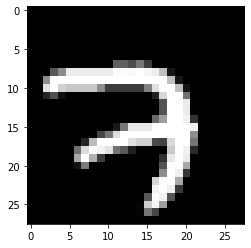

In [15]:
plt.imshow(mnist.train.images[0].reshape((28,28)),cmap="gray")
print(mnist.train.labels[0])

In [16]:
def plot_image(num):
    plt.imshow(mnist.train.images[num].reshape((28,28)),cmap="gray")
    print(mnist.train.labels[num])
    

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


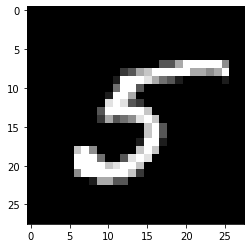

In [17]:
plot_image(599)

In [26]:
x=tf.placeholder(tf.float32,shape=([None,784]))
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable((tf.zeros([10])))

## softmax converting all data member into probablity distribution (e*(-z)/summessionn(e*(-z)))

In [27]:
y=tf.nn.softmax(tf.matmul(x,w)+b)

In [28]:
y_a=tf.placeholder(tf.float32,shape=[None,10])

In [29]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_a-tf.log(y),reduction_indices=[1]))

In [30]:
sess=tf.InteractiveSession()

In [31]:
tf.global_variables_initializer().run()

In [34]:
mnist.train.images.shape

(55000, 784)

In [32]:
for i in range(500):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_x,y_a:batch_y})

What use batch? 

we sent image for processing not all at a time we only send for processing small number size so we use batch 

How to decide batch number ?



In [35]:
correct_predictions=tf.equal(tf.argmax(y_a,1),tf.argmax(y,1))

In [36]:
acc=tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [37]:
sess.run(acc,feed_dict={x:mnist.test.images,y_a:mnist.test.labels})

0.098

In [38]:
w_n=sess.run(w)

In [39]:
w_n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
b_n=sess.run(b)

In [41]:
b_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
sess.close()